# A simplified version of the Logistic regression model

In [1]:
import numpy as np

class Simple_LogisticRegression:
    def __init__(self, lr=0.1, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        """Sigmoid activation: squashes real numbers to (0,1)."""
        return 1 / (1 + np.exp(-z))

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            # linear output (z = w·x + b)
            z = np.dot(X_train, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            # gradients of the logistic log-loss
            # log-loss L = - (1/n) Σ [ y*log(p) + (1-y)*log(1-p) ]
            dw = (1/n_samples) * np.dot(X_train.T, (y_pred - y_train))
            db = (1/n_samples) * np.sum(y_pred - y_train)

            # update step (gradient descent)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X_test):
        z = np.dot(X_test, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        return (y_pred >= 0.5).astype(int)

    def predict_proba(self, X_test, two_columns=False):
        """
        Return predicted probabilities.
        By default returns p(y=1|x) as shape (n,).
        If two_columns=True, returns shape (n, 2): [p(y=0), p(y=1)] similar to scikit-learn.
        """
        z = np.dot(X_test, self.weights) + self.bias   # linear score
        p1 = self.sigmoid(z)                           # probability for class 1
        if two_columns:
            return np.column_stack((1 - p1, p1))
        return p1


# Import the iris dataset and and create a binary classification problem.

In [2]:
from sklearn import datasets

iris = datasets.load_iris()           # load the Iris dataset (returns a Bunch: dict-like object)
print(list(iris.keys()))              # inspect available fields: e.g., ['data','target','target_names','feature_names',...]

X = iris["data"][:, 3:]               # features: take ONLY the 4th column (index 3 = petal width, in cm)
                                      # '[:, 3:]' keeps it 2D with shape (n_samples, 1); use '[:, 3]' for 1D

y = (iris["target"] == 2).astype(int) # labels: make it binary — 1 if class index == 2 (Iris virginica), else 0
                                      # mapping (by default): 0=setosa, 1=versicolor, 2=virginica


print(X.shape)
print(y.shape)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
(150, 1)
(150,)


# Apply the custom logistic regression model

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split the data

model = Simple_LogisticRegression(lr=0.1, n_iter=1000)
model.fit(X_train, y_train)
preds = model.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

1.0


In [4]:
model.predict_proba(X_test, two_columns=True) # predict the probability scores

array([[0.77680111, 0.22319889],
       [0.98090374, 0.01909626],
       [0.11476864, 0.88523136],
       [0.58657738, 0.41342262],
       [0.65676927, 0.34323073],
       [0.97441637, 0.02558363],
       [0.72071792, 0.27928208],
       [0.11476864, 0.88523136],
       [0.58657738, 0.41342262],
       [0.77680111, 0.22319889],
       [0.24128565, 0.75871435],
       [0.98940973, 0.01059027],
       [0.98577009, 0.01422991],
       [0.98940973, 0.01059027],
       [0.98090374, 0.01909626],
       [0.51268194, 0.48731806],
       [0.14882646, 0.85117354],
       [0.82436664, 0.17563336],
       [0.72071792, 0.27928208],
       [0.14882646, 0.85117354],
       [0.98577009, 0.01422991],
       [0.36645562, 0.63354438],
       [0.97441637, 0.02558363],
       [0.19081248, 0.80918752],
       [0.24128565, 0.75871435],
       [0.11476864, 0.88523136],
       [0.36645562, 0.63354438],
       [0.11476864, 0.88523136],
       [0.98090374, 0.01909626],
       [0.98577009, 0.01422991]])

In [5]:
model.predict_proba(X_test, two_columns=False) # predict the probability scores

array([0.22319889, 0.01909626, 0.88523136, 0.41342262, 0.34323073,
       0.02558363, 0.27928208, 0.88523136, 0.41342262, 0.22319889,
       0.75871435, 0.01059027, 0.01422991, 0.01059027, 0.01909626,
       0.48731806, 0.85117354, 0.17563336, 0.27928208, 0.85117354,
       0.01422991, 0.63354438, 0.02558363, 0.80918752, 0.75871435,
       0.88523136, 0.63354438, 0.88523136, 0.01909626, 0.01422991])

In [6]:
preds

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0])

notice that when the probability score goes beyond 0.5 (the threshold) model sets it to 1.

# Plot the result to see the effect of the threshold

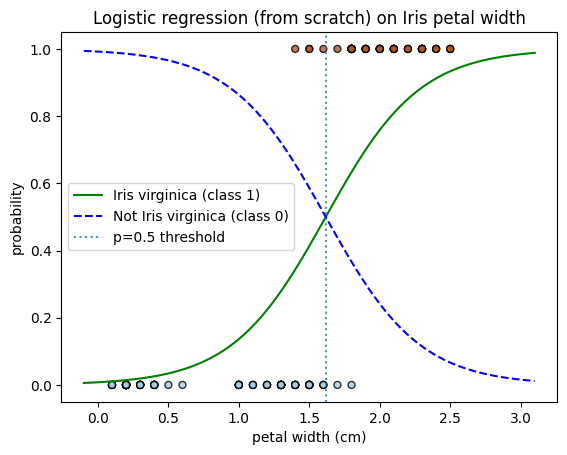

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Dense grid across observed petal-width range
x_min, x_max = 0, 3
X_new = np.linspace(x_min - 0.1, x_max + 0.1, 1000).reshape(-1, 1)

# Probabilities from your model
proba = model.predict_proba(X_new, two_columns=True)  # [:,0]=p(class 0), [:,1]=p(class 1)

plt.figure()
plt.plot(X_new, proba[:, 1], "g-",  label="Iris virginica (class 1)")
plt.plot(X_new, proba[:, 0], "b--", label="Not Iris virginica (class 0)")

# Original points at y=0/1 for reference
plt.scatter(X[:, 0], y, c=y, cmap=plt.cm.Paired, edgecolor="k", s=25, alpha=0.8)

# Optional: vertical decision boundary where p=0.5  (w*x + b = 0)
w = model.weights[0]
b = model.bias
if abs(w) > 1e-12:
    x_boundary = -b / w
    plt.axvline(x=x_boundary, linestyle=":", alpha=0.8, label="p=0.5 threshold")

plt.xlabel("petal width (cm)")
plt.ylabel("probability")
plt.ylim(-0.05, 1.05)
plt.legend(loc="best")
plt.title("Logistic regression (from scratch) on Iris petal width")
plt.show()


# Now use the sklearn logistic regression model

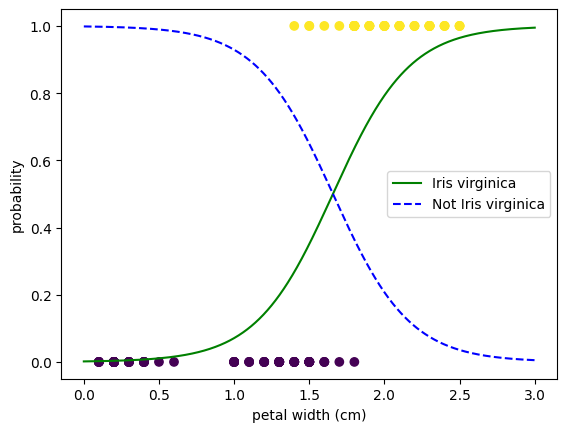

In [8]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-",
label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--",
label="Not Iris virginica")
plt.scatter(X,y,c=y)
plt.xlabel('petal width (cm)')
plt.ylabel('probability')
plt.legend()

Our model do produce similar result akin to sklearn